In [ ]:
!pip install dlib
!pip install imutils
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=e3f2221918fd454ac0005a80adbf4b14c7af8d4c035eeec466544f5bb5d36790
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import cv2
import dlib
from time import time
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [ ]:
hog_face_detector = dlib.get_frontal_face_detector()
hog_face_detector

In [ ]:
def hogDetectFaces(image, hog_face_detector, display = True):

    height, width, _ = image.shape

    output_image = image.copy()

    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    start = time()

    results = hog_face_detector(imgRGB, 0)

    end = time()

    for bbox in results:

        x1 = bbox.left()
        y1 = bbox.top()
        x2 = bbox.right()
        y2 = bbox.bottom()

        cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=width//200)

    if display:

        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=width//700, color=(0,0,255), thickness=width//500)

        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');

    else:

        return output_image, results

In [ ]:
def process_images_in_directory(directory_path, hog_face_detector, display=True):
    # Retrieve a list with all .jpg -files
    image_paths = Path(directory_path).glob('*.jpg')

    for image_path in image_paths:
        image = cv2.imread(str(image_path))
        hogDetectFaces(image, hog_face_detector, display)

# path to images
image_directory = '/content/drive/My Drive/images/'

# Call the function with image path and face_detector
process_images_in_directory(image_directory, hog_face_detector)

Output hidden; open in https://colab.research.google.com to view.

In [2]:
def calculate_performance_metrics(TP, FP, FN):
    # Calculate Precision
    Precision = TP / (TP + FP)

    # Calculate Recall
    Recall = TP / (TP + FN)

    # Calculate F1 Score
    F1_Score = 2 * (Precision * Recall) / (Precision + Recall)

    return Precision, Recall, F1_Score

In [3]:
# Values
TP = 137
FP = 1
FN = 47

In [4]:
Precision, Recall, F1_Score = calculate_performance_metrics(TP, FP, FN)

print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 Score: {F1_Score:.4f}")

Precision: 0.9928
Recall: 0.7446
F1 Score: 0.8509


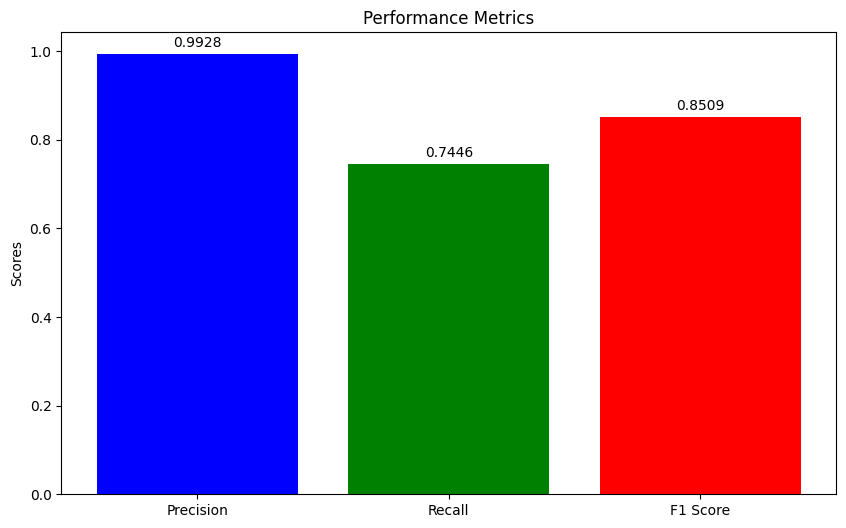

In [8]:
### Metric graph for visualization ###

# Labels for the metrics
metrics = ['Precision', 'Recall', 'F1 Score']

# Values corresponding to each metric
values = [Precision, Recall, F1_Score]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])

# Adding the value labels on top of each bar
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f"{value:.4f}", ha = 'center', va = 'bottom')

# Setting the title and labels
plt.title('Performance Metrics')
plt.ylabel('Scores')
plt.show()